# Visualisation of air quality time series

### imports

In [57]:
from dateutil.parser import parse 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime

plt.rcParams.update({'figure.figsize': (16, 8)})

## Import data

In [66]:
data = pd.read_csv("..\data\AirQualityUCI.csv", delimiter=";", parse_dates=[["Date", "Time"]])
data.head()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004 18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/03/2004 19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/03/2004 20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502"
3,10/03/2004 21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867"
4,10/03/2004 22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"


## Data Preparation

### Make Date_Time to Timestamp

In [67]:
print("'Date' datatype:", type(data.Date_Time[0]))

data.Date_Time = data.Date_Time.apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))

print("'date_time' datatype:", type(data.Date_Time[0]))

'Date' datatype: <class 'str'>
'date_time' datatype: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


### convert strings to floats

In [68]:
data = data.applymap(lambda x: float(x.replace(',', '.')) if type(x) == type('str') else x)

# change column data type
data_obj = data.select_dtypes(include='object')
for col in data_obj.columns:
    data.astype({col:'float32'})

In [69]:
for col in data.columns:
    print(col, data[col].dtype)

Date_Time datetime64[ns]
CO(GT) float64
PT08.S1(CO) int64
NMHC(GT) int64
C6H6(GT) float64
PT08.S2(NMHC) int64
NOx(GT) int64
PT08.S3(NOx) int64
NO2(GT) int64
PT08.S4(NO2) int64
PT08.S5(O3) int64
T float64
RH float64
AH float64


## Explore data

<AxesSubplot:>

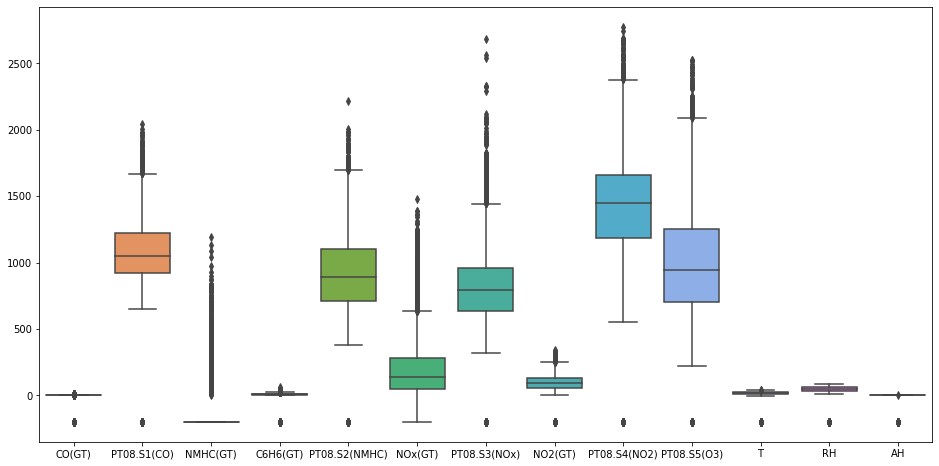

In [70]:
sns.boxplot(data=data)

In [71]:
### NaN values

Text(0.5, 1.0, 'Number of outliers')

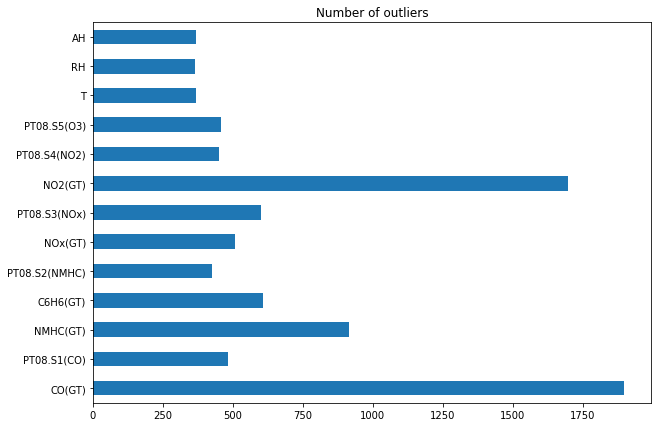

In [72]:
## find outliers

# select only columns with number as datatype
data_n = data.select_dtypes(exclude=['object', 'datetime64[ns]'])

Q1 = data_n.quantile(0.25)
Q3 = data_n.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data_n < (Q1 - 1.5 * IQR)) |(data_n > (Q3 + 1.5 * IQR))).sum()

# Plot
plt.figure(figsize=(10, 7))
outliers.plot(kind="barh")
plt.title("Number of outliers")

In [77]:
data.columns

Index(['Date_Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [78]:
## delete failures

indexes = data[(data['CO(GT)'] < 0) | (data['PT08.S1(CO)'] < 0) | (data['NMHC(GT)'] < 0) | (data['C6H6(GT)'] < 0) | (data['PT08.S2(NMHC)'] < 0) | (data['NOx(GT)'] < 0) | (data['PT08.S3(NOx)'] < 0) | (data['NOx(GT)'] < 0) | (data['PT08.S3(NOx)'] < 0) | (data['NO2(GT)'] < 0) | (data['PT08.S4(NO2)'] < 0) | (data['PT08.S5(O3)'] < 0) | (data['RH'] < 0) | (data['AH'] < 0)].index

data_pos = data.drop(indexes)


<AxesSubplot:>

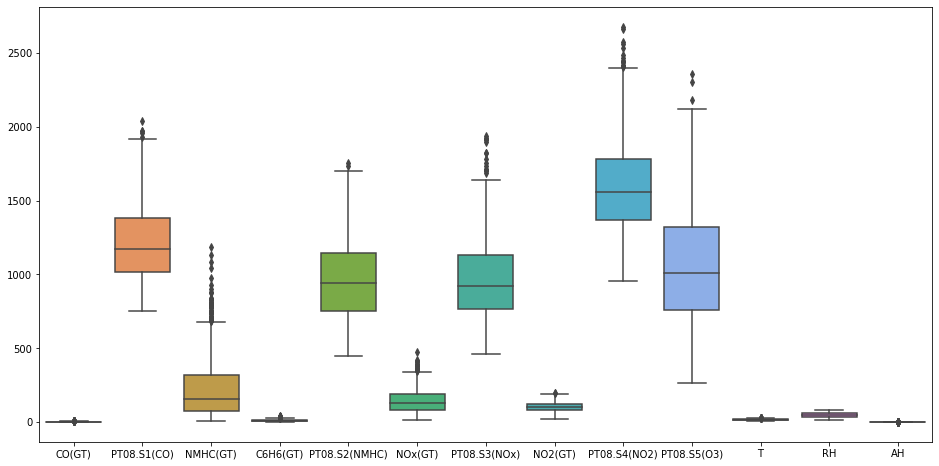

In [79]:
sns.boxplot(data=data_pos)

<AxesSubplot:xlabel='Date_Time', ylabel='CO(GT)'>

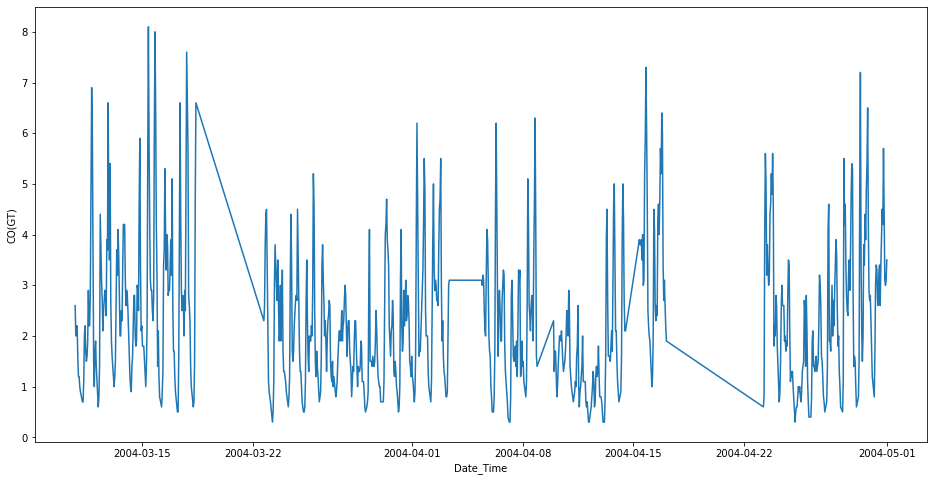

In [84]:
plt.figure(figsize=(16,8))
sns.lineplot(x="Date_Time", y="CO(GT)", data=data_pos)

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot()